In [6]:
THRESHOLD_Z_PERCENT = .25
DISTANCE_FACTOR = 20

def get_adjustments(box, center_of_frame_coordinates):
    fX, fY = center_of_frame_coordinates
    cX = box["centroid_x"]
    cY = box["centroid_y"]
    cZ = box["height"] / (center_of_frame_coordinates[1] * 2)

    print("CY", cY)
    print("fY", fY)
    x = cX - fX
    y = cY - fY
    z = (cZ - THRESHOLD_Z_PERCENT) * DISTANCE_FACTOR
    
    return [x, y, z]
    

# # for adjustment in adjustments:
#       if adjustment != "":
#         continue
#     os.Shell(adjustment[0] + adjust)

def determine_flight_directions(adjustments):
    horiz, vert, dist = adjustments
    directions = list()
    if horiz > 0:
        directions.append(["move_right", abs(horiz)])
    elif horiz < 0:
        directions.append(["move_left", abs(horiz)])
    else:
        directions.append("")

    if vert < 0:
        directions.append(["move_up", abs(vert)])
    elif vert > 0:
        directions.append(["move_down", abs(vert)])
    else:
        directions.append("")


    if dist < 0:
        directions.append(["move_forward", abs(dist)])
    elif dist > 0:
        directions.append(["move_backward", abs(dist)])
    else:
        directions.append("")

    return directions

def fly_drone():
    cap = cv2.capture()
    while True:
        ret, frame = cap.read()
        width, height = frame.shape()
        center_of_frame_coordinates = [int(width/2), int(height/2)]

        box = get_box("stuff")

        adjustments = get_adjustments(box, center_of_frame_coordinates)
        fly_drone(adjustments)


In [7]:
def test_flight_directions(box, center_of_frame_coordinates, expected_result):
    adjustments = get_adjustments(box, center_of_frame_coordinates)
    directions = determine_flight_directions(adjustments)
    
    test_directions = []
    for direction in directions:
        if direction == "":
            test_directions.append(direction)
        else:
            test_directions.append(direction[0])
    

    if test_directions != expected_result:
        print("FAIL")
        print("Expected:", expected_result)
        print("Got:", test_directions)
        exit(1)
    else:
        print("OK")
        
print("##################### RUNNING TESTS")
center_of_frame_coordinates = [256, 256]

print("# test x axis")
box = {
    "centroid_x": 233,
    "centroid_y": center_of_frame_coordinates[1],
    "width": 50,
    "height": (center_of_frame_coordinates[1] * 2) * THRESHOLD_Z_PERCENT
}
expected_result = ["move_left", "", ""]
test_flight_directions(box, center_of_frame_coordinates, expected_result)

box["centroid_x"] = 257
expected_result = ["move_right", "", ""]
test_flight_directions(box, center_of_frame_coordinates, expected_result)

box["centroid_x"] = center_of_frame_coordinates[0]
expected_result = ["", "", ""]
test_flight_directions(box, center_of_frame_coordinates, expected_result)


print("# test y axis")
box["centroid_y"] = 257
expected_result = ["", "move_down", ""]
test_flight_directions(box, center_of_frame_coordinates, expected_result)

box["centroid_y"] = 254
expected_result = ["", "move_up", ""]
test_flight_directions(box, center_of_frame_coordinates, expected_result)


print("# test z axis")
box = {
    "centroid_x": center_of_frame_coordinates[0],
    "centroid_y": center_of_frame_coordinates[1],
    "width": 50,
    "height": (center_of_frame_coordinates[1]*2) * .25
}
    
expected_result = ["", "", ""]
test_flight_directions(box, center_of_frame_coordinates, expected_result)

box["height"] = (center_of_frame_coordinates[1]*2) * .26
expected_result = ["", "", "move_backward"]
test_flight_directions(box, center_of_frame_coordinates, expected_result)

box["height"] = (center_of_frame_coordinates[1]*2) * .24
expected_result = ["", "", "move_forward"]
test_flight_directions(box, center_of_frame_coordinates, expected_result)

##################### RUNNING TESTS
# test x axis
CY 256
fY 256
OK
CY 256
fY 256
OK
CY 256
fY 256
OK
# test y axis
CY 257
fY 256
OK
CY 254
fY 256
OK
# test z axis
CY 256
fY 256
OK
CY 256
fY 256
OK
CY 256
fY 256
OK



Objects Found and Confidence Level:

1. car: 0.999967
p1 (878, 440) p2 (1192, 677)
width_x 314
width_y -237
circle coordinates: (1035, 558)

Width: 314
Height: -237
X Position: 1035
Y Position: 558


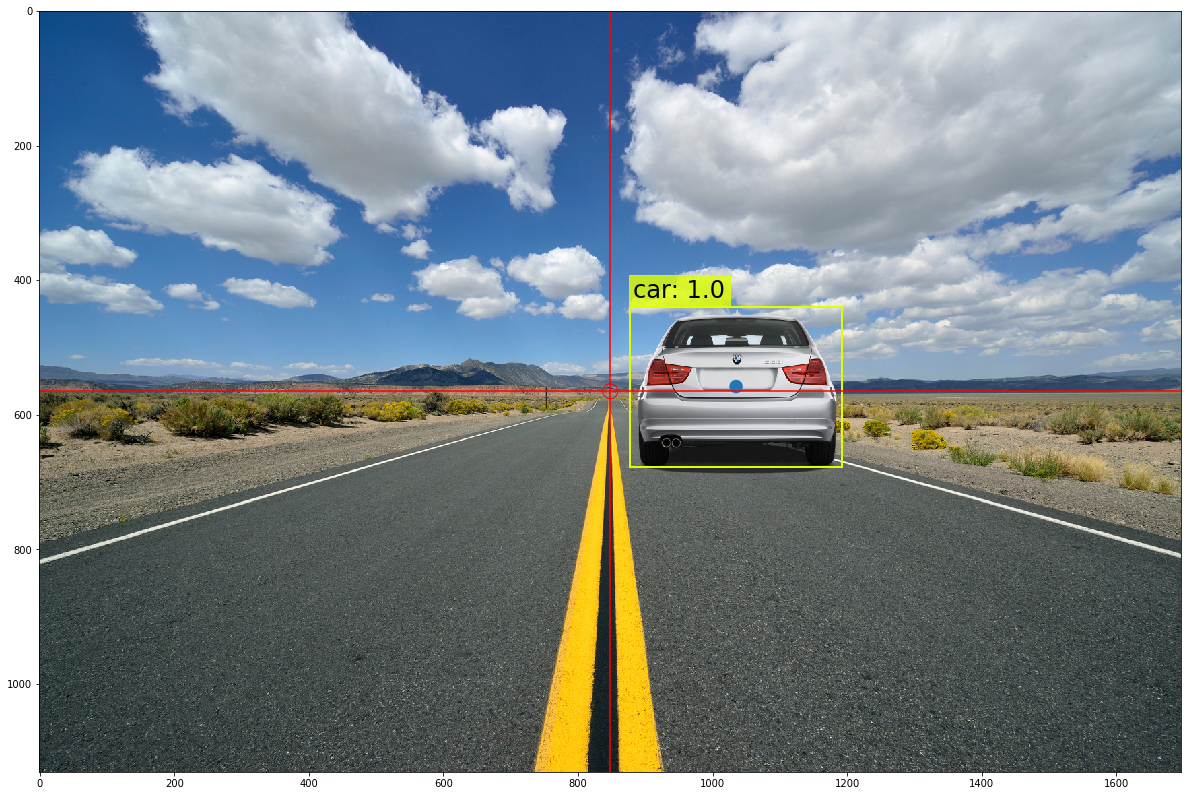

In [8]:
import cv2
import matplotlib.pyplot as plt
from murph_utils import *
from darknet import Darknet
from flight_model import FlightModel


cfg_file = './cfg/yolov3.cfg'
weight_file = './weights/yolov3.weights'
namesfile = 'data/coco.names'
m = Darknet(cfg_file)
m.load_weights(weight_file)
class_names = load_class_names(namesfile)

nms_thresh = 0.6  
iou_thresh = 0.4
plt.rcParams['figure.figsize'] = [24.0, 14.0]

img = cv2.imread('./images/cars/right-far.jpg')
original_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
resized_image = cv2.resize(original_image, (m.width, m.height))

boxes = detect_objects(m, resized_image, iou_thresh, nms_thresh)
b = boxes[0][0]


# Print the objects found and the confidence level
print_objects(boxes, class_names)


#Plot the image with bounding boxes and corresponding object class labels
plot_boxes(original_image, boxes, class_names, plot_labels = True)

plt.show()

In [4]:
box_attrs = get_boxes(original_image, boxes, class_names, plot_labels = False)

objWidth = box_attrs[0]
objHeight = box_attrs[1]
objX, objY = box_attrs[2]

print("\nWidth: " + str(objWidth))
print("Height: " + str(objHeight))
print("X Position: " + str(objX))
print("Y Position: " + str(objY))

# imageHeight, imageWidth, imageChannels = img.shape
# center_of_frame_coordinates = [imageWidth / 2.0, imageHeight / 2.0]
box = {"centroid_x": objX, "centroid_y": objY, "width": objWidth, "height": objHeight}

adjustments = get_adjustments(box, center_of_frame_coordinates)
directions = determine_flight_directions(adjustments)
print("directions:", directions)


NameError: name 'get_boxes' is not defined

In [ ]:
print(imageHeight)
print(imageWidth)

In [ ]:
print(center_of_frame_coordinates)

In [ ]:
print(objX)

In [ ]:
# NICE FUCKING WORK, COLIN!